<a href="https://colab.research.google.com/github/lin3372/LvL200_ML_DatSci/blob/main/150_Bayes_Classification_(Scikit_learn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes Classification
[Day12-Scikit-learn介紹(4)_ Bayes Classification](https://ithelp.ithome.com.tw/articles/10205582)

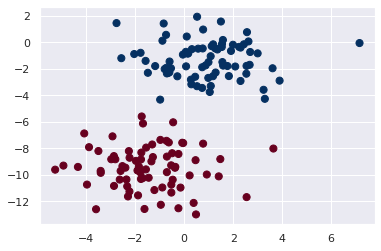

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.datasets import make_blobs
X, y = make_blobs(150, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

創建貝氏糢型的一種非常快速的方法就是假設數據由高斯分佈描述，維度之間沒有平方差關係。只需找到每個標籤內各點的平均值和標準即可擬合此糢型，這就是定義這種分佈所需的全部內容：

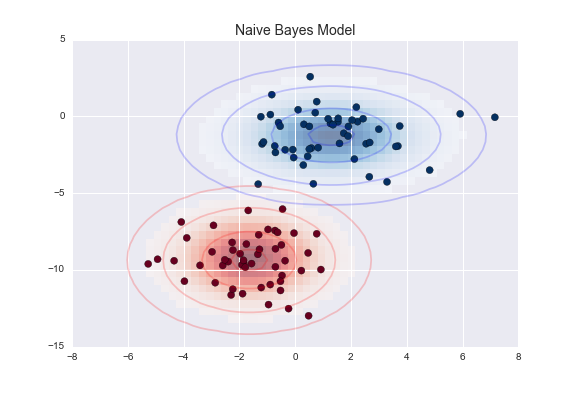

上圖的橢圓表示每個標籤的高斯生成糢型，朝向橢圓中心的機率值更大。有了這個每個類別的生成糢型，我們有一個簡單的方法來計算任何數據點的類似於 image.png，因此我們可以快速計算後驗比率並確定哪個標籤給定點信賴值是最高的。



In [8]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

生成一些新的數據並預設標籤

In [9]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

再來繪製這些新數據，以了解決策邊界的位置：

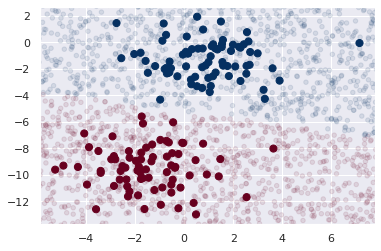

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

貝氏分類可以利用predict_proba()方法，簡單的做機率值分配


In [11]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.96, 0.04],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ]])

## Multinomial Naive Bayes

在sklearn中，匯入資料集fetch_20newsgroups，這個資料集有20個新聞的詞語



In [12]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

下載、訓練想要的資料集合類別


In [14]:
categories = ['talk.religion.misc', 'soc.religion.christian','sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



為了讓這些數據可以適用於機器學習，因此，需要把每個字串轉換為數字向量(TF-IDF向量化)，TfidfVectorizer()

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

將應用於數據訓練糢型，並預測測試數據的標籤

In [16]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

經過測試數據的標籤並對它們進行評估，以了解估算器的精確度。以下是測試數據的真實和預測標籤之間的混淆矩陣

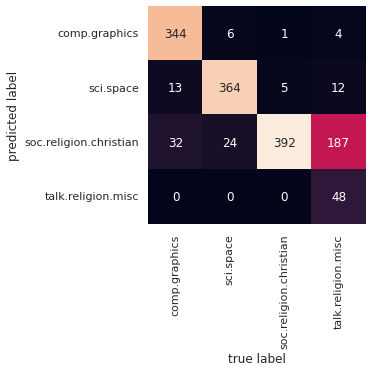

In [17]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');